(([], []), ([], []))

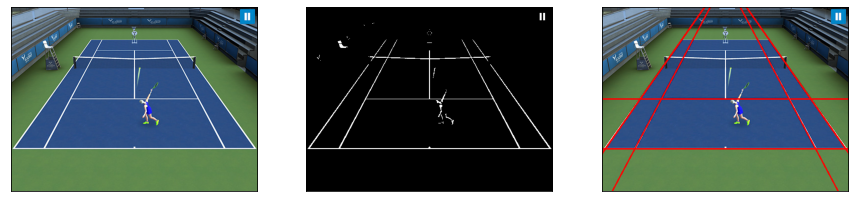

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

img = cv.imread('tennis.jpg', cv.IMREAD_COLOR)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

ret, mask = cv.threshold(gray, 200, 255, cv.THRESH_BINARY)

lines = cv.HoughLines(mask, 1, np.pi/180, 200)

res = img.copy()

for line in lines[0:10]:
    rho,theta = line[0]
    
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv.line(res, (x1,y1), (x2,y2), (0,0,255), 2)


plt.figure(figsize=(15,40)) 

plt.subplot(1,3,1), plt.imshow(img[:,:,::-1])
plt.xticks([]), plt.yticks([])

plt.subplot(1,3,2), plt.imshow(mask, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(1,3,3), plt.imshow(res[:,:,::-1])
plt.xticks([]), plt.yticks([])
